**importing libraries **

In [96]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv


**Reading tsv file **

In [97]:
#reading data
df=pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**Exploring data**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [99]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

**Data Visualization**

<Axes: xlabel='Liked', ylabel='count'>

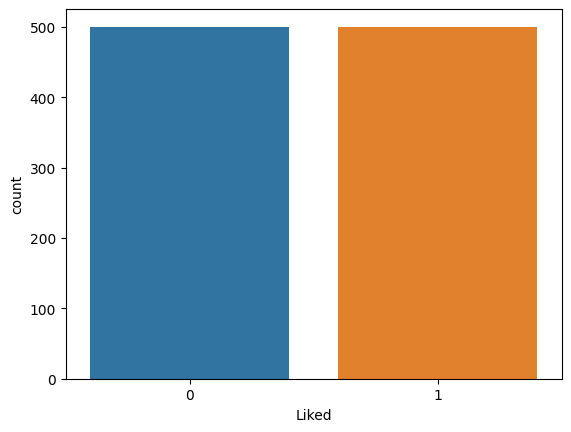

In [100]:
sns.countplot(x=df['Liked'])

* in this case data is highly balanced as values of unliked(0) equal to liked(1) 

In [101]:
df['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [102]:
df['Review'].apply(len)  #counting letters in reviews.

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

**Making new column of length of reviews **

In [103]:
df['length of reviews']=df['Review'].apply(len)
df

,Review,Liked,length of reviews
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


Maximum number of letters in a review

In [104]:
df['length of reviews'].max()

149

Index of maximum size

In [105]:
df['length of reviews'].idxmax()

985

Printing the max size review

In [106]:
df.iloc[df['length of reviews'].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

* it was a negative review

minimum review words 

In [107]:
df['length of reviews'].min()

11

Printing shortest review

In [108]:
df.iloc[df['length of reviews'].idxmin()][0]

'DELICIOUS!!'

* it was a positive review 

**Data Preprocessing**

In [109]:
df['Review'][0]

'Wow... Loved this place.'

**Data Cleaning**

In [110]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

* Stopwords : The words which on removing generally do not cause change meaning of sentence.

In [111]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

In [113]:
corpus = []

for i in range(len(df)):
    s = re.sub('[^a-zA-Z]', " ", df['Review'][i])
    s = s.lower()
    s =str (s).split()
    s = [word for word in s if not word in stopwords.words('english')]
    s = ' '.join(s)
    s =  ps.stem(s)
    corpus.append(s)

corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

Countvectorizer to convert object to vector 

In [114]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray().shape

(1000, 1994)

In [115]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Build model naive bayes**

In [116]:
x=cv.fit_transform(corpus).toarray()
y=df['Liked']

In [117]:
print("Number of samples in x:", len(x))
print("Number of samples in y", len(y))

Number of samples in x: 1000
Number of samples in y 1000


In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) 

In [119]:
x_train.shape ,x_test.shape

((750, 1994), (250, 1994))

In [120]:
y_train.shape , y_test.shape

((750,), (250,))

In [121]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [122]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1])

The model gives 1 for good comment and 0 for bad comment

In [123]:
y_test.values

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1])

**Model Evaluation**

In [124]:
from sklearn.metrics import confusion_matrix ,accuracy_score , classification_report

In [125]:
print(accuracy_score(y_test,y_pred))

0.66


In [126]:
print(confusion_matrix(y_test,y_pred))

[[68 66]
 [19 97]]


* values correctly detected by the algorithm were 68% true positive (these are already positive and algorithm said this .)

* and 97% true negative (they are already negative and algorithm said this .)

* there are 66% false positive , the algorithm failed to detect them ( they are already negative but algorithm said positive.

* there are 19% false negative , the algorithm failed to detect them ( they are positive but algorithm not said this 

In [127]:
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       0.78      0.51      0.62       134
           1       0.60      0.84      0.70       116

    accuracy                           0.66       250
   macro avg       0.69      0.67      0.66       250
weighted avg       0.70      0.66      0.65       250



* precision = the exact value, in the sense of how much algorithm said it was correct and it was indeed correct.

* the recall value means how much the algorithm detects from the requested. 

* f1 score repesents the efficiency of relationship between precision and recall 

**Model deployment**

In [128]:
import pickle

In [129]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Saved successfully")

Saved successfully
